In [1]:
import numpy as np
import pandas as pd

data = pd.read_json('train.json')
# get the list of ingredients
ingredientList = sorted(list(set([ingredient for i in range(data.shape[0]) for ingredient in data.loc[i,'ingredients']])))
# the mapping between ingredient and its index
ingredient2index = dict(zip(ingredientList, range(len(ingredientList))))
# create a binary matrix indicating whether or not an ingredient is in a recipe
binaryIngredientsMat = np.zeros((data.shape[0], len(ingredientList)))
for iRecipe in range(data.shape[0]):
    binaryIngredientsMat[iRecipe, [ingredient2index[ingredient] for ingredient in data.loc[iRecipe, 'ingredients']]] = 1
dataBinaryIngredients = pd.DataFrame(binaryIngredientsMat, columns=ingredientList)
dataBinaryIngredients.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
def splitTrainingTesting(X):

    df_test = X.sample(frac=.2, random_state=3) 

    df_train = X.drop(df_test.index)

    return df_test, df_train

df_test, df_train = splitTrainingTesting(dataBinaryIngredients)

df_train.head()

,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,1% low-fat chocolate milk,1% low-fat cottage cheese,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
Xtrain = df_train.values
Xtest = df_test.values

In [4]:
%%time
#doing feature selection because running k means for many cluster sizes is too slow
from sklearn.feature_selection import VarianceThreshold

print(Xtrain.shape, Xtest.shape)

selector = VarianceThreshold(threshold=0.03)
Xtrain = selector.fit_transform(Xtrain)
print(Xtrain.shape)

(31819, 6714) (7955, 6714)
(31819, 61)
Wall time: 5.95 s


Wall time: 11min 49s


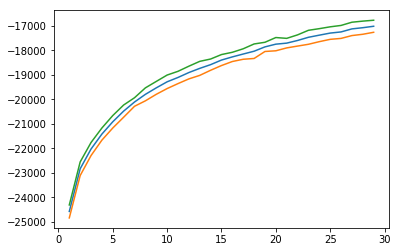

In [17]:
%%time

#k means with euclidean distance

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.model_selection import cross_val_score

length = 30

arr = np.zeros(length-1)
arr1 = np.zeros(length-1)
arr2 = np.zeros(length-1)
xxx = np.array(range(1, length))

for n_clusters in range(1, length):
    clusterer = KMeans(n_clusters=n_clusters) #, random_state=...
    scores = cross_val_score(clusterer, Xtrain, cv=5)
    #cluster_labels = clusterer.fit_predict(X)  
    arr[n_clusters-1] = scores.mean()# clusterer.score(X)
    arr1[n_clusters-1] = scores.mean() - scores.std() * 2
    arr2[n_clusters-1] = scores.mean() + scores.std() * 2
    #print("For n_clusters =", n_clusters,
    #  "The score is :", clusterer.score(X))
plt.plot(xxx, arr, xxx, arr1, xxx, arr2)

Text(0, 0.5, 'score from 5-fold CV')

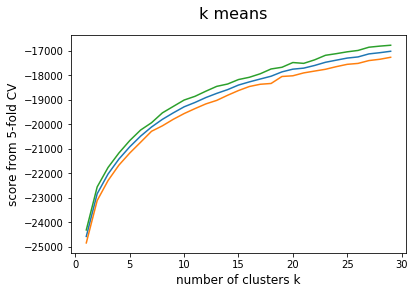

In [20]:
fig = plt.figure()
plt.plot(xxx, arr, xxx, arr1, xxx, arr2)
fig.suptitle('k means', fontsize=16)
plt.xlabel('number of clusters k', fontsize=12)
plt.ylabel('score from 5-fold CV', fontsize=12)

In [21]:
print(xxx)
print(arr)
print(arr1)
print(arr2)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]
[-24578.53980585 -22837.88663585 -22032.92095366 -21422.06315388
 -20921.13761583 -20485.65128603 -20114.5835564  -19802.05385035
 -19537.80993518 -19290.31819093 -19112.93791036 -18912.51796901
 -18742.21915842 -18590.3491998  -18402.91152124 -18274.17214502
 -18156.76424104 -18042.48641167 -17865.32363898 -17754.6012644
 -17712.56875839 -17604.09442729 -17474.16702468 -17387.10814638
 -17302.54640865 -17255.28476009 -17131.61172849 -17082.91493953
 -17024.49132504]
[-24843.02465134 -23115.93340103 -22299.14593384 -21669.43322175
 -21175.09557366 -20734.26399779 -20289.03610653 -20066.38447232
 -19800.49327123 -19565.99372425 -19363.50811134 -19171.72241211
 -19028.19816936 -18819.88388231 -18627.03057558 -18462.51144843
 -18370.78620124 -18338.38383719 -18053.10785467 -18024.92025908
 -17907.29189361 -17832.55224854 -17759.55986649 -17652.1849768
 -17557.67064843 -17519.8255554  -17403.93174494 

In [ ]:
**************************************************************************************************
# trying with more features

In [5]:
Xtrain = df_train.values
Xtest = df_test.values

In [6]:
%%time
#doing feature selection because running k means for many cluster sizes is too slow
from sklearn.feature_selection import VarianceThreshold

print(Xtrain.shape, Xtest.shape)

selector = VarianceThreshold(threshold=0.01)
Xtrain = selector.fit_transform(Xtrain)
print(Xtrain.shape)

(31819, 6714) (7955, 6714)
(31819, 194)
Wall time: 2.24 s


Wall time: 2min 2s


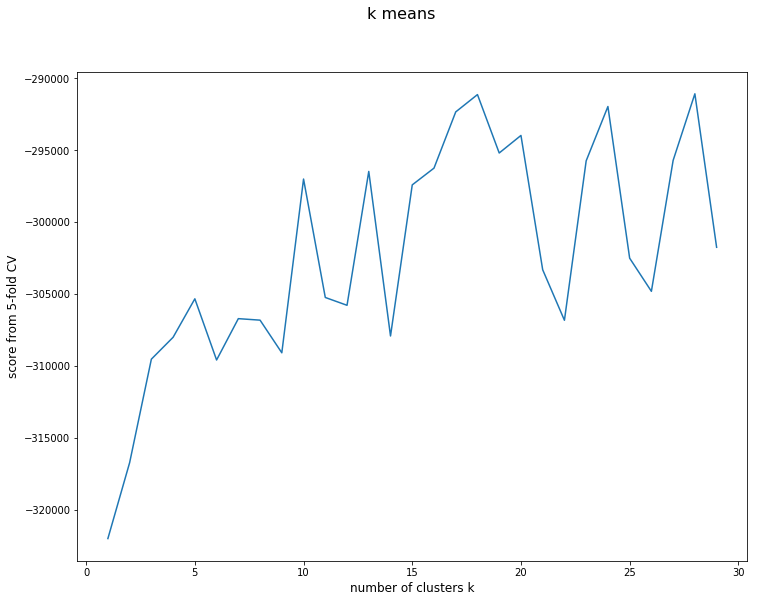

In [34]:
%%time
# use mini batch k means to speed up things!
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html#sklearn.cluster.MiniBatchKMeans

from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt

length = 30

arr = np.zeros(length-1)
arr1 = np.zeros(length-1)
arr2 = np.zeros(length-1)
xxx = np.array(range(1, length))

for n_clusters in range(1, length):
    clusterer = MiniBatchKMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(Xtrain)  
    arr[n_clusters-1] = clusterer.score(Xtrain)

fig = plt.figure()
plt.plot(xxx, arr)
fig.suptitle('k means', fontsize=16)
plt.xlabel('number of clusters k', fontsize=12)
plt.ylabel('score from 5-fold CV', fontsize=12)

In [14]:
print(xxx)
print(arr)
print(arr1)
print(arr2)

[1 2]
[-322009.01815333 -315735.23061422]
[0. 0.]
[0. 0.]


In [ ]:
********************************************************************************************

In [45]:
Xtrain = df_train.values
Xtest = df_test.values

In [ ]:
%%time

#cutting the number of samples in the training and test sets to increase speed
from sklearn.model_selection import train_test_split

Xtrain, placeholder= train_test_split(Xtrain, test_size=0.9)

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn.model_selection import cross_val_score

length = 30

arr = np.zeros(length-1)
arr1 = np.zeros(length-1)
arr2 = np.zeros(length-1)
xxx = np.array(range(1, length))

for n_clusters in range(1, length):
    clusterer = KMeans(n_clusters=n_clusters) #, random_state=...
    scores = cross_val_score(clusterer, Xtrain, cv=5)
    #cluster_labels = clusterer.fit_predict(X)  
    arr[n_clusters-1] = scores.mean()# clusterer.score(X)
    arr1[n_clusters-1] = scores.mean() - scores.std() * 2
    arr2[n_clusters-1] = scores.mean() + scores.std() * 2
    #print("For n_clusters =", n_clusters,
    #  "The score is :", clusterer.score(X))
plt.plot(xxx, arr, xxx, arr1, xxx, arr2)
fig = plt.figure()
plt.plot(xxx, arr, xxx, arr1, xxx, arr2)
fig.suptitle('k means', fontsize=16)
plt.xlabel('number of clusters k', fontsize=12)
plt.ylabel('score from 5-fold CV', fontsize=12)

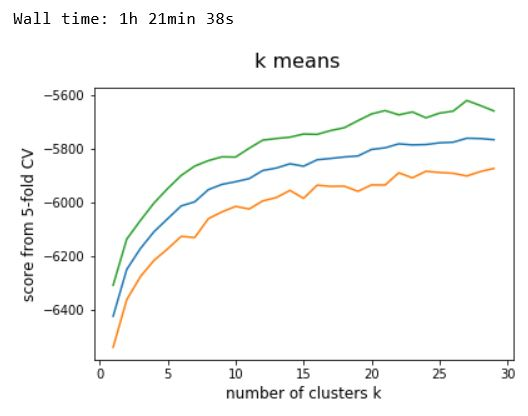

In [ ]:
********************************************************************************************

In [5]:
from sklearn.cluster import KMeans
#k is chosen as 2
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)

clusterer = KMeans(n_clusters=2)
cluster_labels = clusterer.fit_predict(X)

# evaluate kmeans with chosen number of clusters on the test data
print("score on training set:", clusterer.score(X))
print("Average score per data point on training set:", clusterer.score(X)/X.shape[0])

print("score on test set:", clusterer.score(Xtest))
print("Average score per data point on test set:", clusterer.score(Xtest)/Xtest.shape[0])

#interpret the results of kmeans
# look at users closest to each center
centers = clusterer.cluster_centers_

(31819, 6714) (7955, 6714)
score on training set: -312972.1158112965
Average score per data point on training set: -9.83601357086321
score on test set: -78096.56739095552
Average score per data point on test set: -9.817293198108802


kosher salt
pepper
salt
(2, 2)
pepper
salt


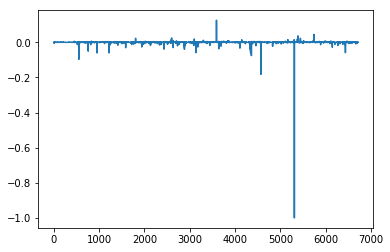

In [13]:
import matplotlib.pyplot as plt
plt.plot(centers[1]-centers[0])

for i in range(df_train.shape[1]-1):
    if abs(centers[1,i]-centers[0,i]) > 0.1:
        print(df_train.iloc[:,i].name)
        
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.004)
new_centers = sel.fit_transform(centers)
print(new_centers.shape)
for i in range(df_train.shape[1]-1):
    if sel.get_support()[i]:
        print(df_train.iloc[:,i].name)

In [4]:
train_ids = df_train.index.values
test_ids = df_test.index.values

In [32]:
trainLabels = data.loc[train_ids,'cuisine'].values
testLabels = data.loc[test_ids,'cuisine'].values

In [48]:
X = df_train.values
Xtest = df_test.values

from sklearn.linear_model import LogisticRegression
for C in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    clf = LogisticRegression(solver='lbfgs', multi_class='multinomial', C=C).fit(X, trainLabels)
    print(C)
    print(clf.score(X, trainLabels))
    print(clf.score(Xtest, testLabels))
    print('-'*20)

0.0001
0.26609887174329805
0.26147077309868005
--------------------
0.001
0.46293095320406047
0.4540540540540541
--------------------
0.01
0.6566202583362142
0.6351979886863608
--------------------
0.1
0.7971337879883089
0.7472030169704589
--------------------


C:\Users\cc26\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1
0.8957226814167636
0.7741043368950346
--------------------


C:\Users\cc26\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


10
0.951946949935573
0.7587680703959774
--------------------


C:\Users\cc26\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


100
0.9601810239165278
0.7436832181018228
--------------------


C:\Users\cc26\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


1000
0.96458091077658
0.7322438717787555
--------------------


KeyboardInterrupt: 

In [46]:
# kmeans with k=2 has separated the group into males and females
print(cluster_labels.shape)
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,'salt']:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,'salt']:
        numSaltInCluster0 += 1
    count += 1
print(numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

(31819,)
100.0 100.0


In [5]:
def convert( bool ):
    if bool:
        return 1
    else: return 0

convert = np.vectorize(convert)

In [6]:
def convertBack(a):
    if a==1:
        return True
    else: return False
    
convertBack = np.vectorize(convertBack)

In [41]:
index=6
print('in cluster ', cluster_labels[index])
print('has salt?', convertBack(df_train.loc[train_ids[index],'salt']))

in cluster  1
has salt? False


In [ ]:
'''
so kmeans with k=2 divides group into those with salt and those without salt
'''

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)

clusterer = KMeans(n_clusters=3)
cluster_labels = clusterer.fit_predict(X)

# evaluate kmeans with chosen number of clusters on the test data
print("score on training set:", clusterer.score(X))
print("Average score per data point on training set:", clusterer.score(X)/X.shape[0])

print("score on test set:", clusterer.score(Xtest))
print("Average score per data point on test set:", clusterer.score(Xtest)/Xtest.shape[0])

#interpret the results of kmeans
# look at users closest to each center
centers = clusterer.cluster_centers_

(31819, 6714) (7955, 6714)
score on training set: -308737.449600148
Average score per data point on training set: -9.702927483583645
score on test set: -77037.59772645915
Average score per data point on test set: -9.68417319000115


(3, 2)
onions
salt
----------------------------------
----------------------------------
results for clusters 1 and 0
onions
salt
----------------------------------
results for clusters 2 and 1
onions
salt
----------------------------------
results for clusters 0 and 2
salt


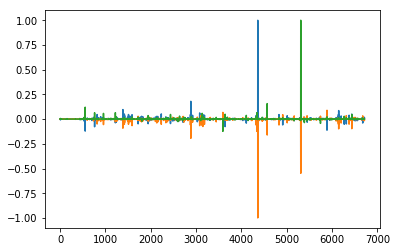

In [52]:
import matplotlib.pyplot as plt

#interpret the results of kmeans
# look at users closest to each center

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01)
new_centers = sel.fit_transform(centers)
print(new_centers.shape)
for i in range(df_train.shape[1]-1):
    if sel.get_support()[i]:
        print(df_train.iloc[:,i].name)

print('----------------------------------')
print('----------------------------------')
        
plt.plot(centers[1]-centers[0])
plt.plot(centers[2] - centers[1])
plt.plot(centers[0] - centers[2])

print('results for clusters 1 and 0')
for i in range(df_train.shape[1]-1):
    if abs(centers[1,i]-centers[0,i]) > 0.2:
        print(df_train.iloc[:,i].name)
print('----------------------------------')
print('results for clusters 2 and 1')
for i in range(df_train.shape[1]-1):
    if abs(centers[2,i]-centers[1,i]) > 0.2:
        print(df_train.iloc[:,i].name)
print('----------------------------------')
print('results for clusters 0 and 2')
for i in range(df_train.shape[1]-1):
    if abs(centers[0,i]-centers[2,i]) > 0.2:
        print(df_train.iloc[:,i].name)

In [57]:
'''
looks like
cluster 0 - salt, no onions
cluster 1 - onions (may or may not have salt)
cluster 2 - no salt, no onions
'''
for index in range(50):
    print('in cluster ', cluster_labels[index])
    print('has salt?', convertBack(df_train.loc[train_ids[index],'salt']))
    print('has onions?', convertBack(df_train.loc[train_ids[index],'onions']))
    print('-'*20)

in cluster  2
has salt? False
has onions? False
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  1
has salt? True
has onions? True
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  2
has salt? False
has onions? False
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  2
has salt? False
has onions? False
--------------------
in cluster  2
has salt? False
has onions? False
--------------------
in cluster  2
has salt? False
has onions? False
--------------------
in cluster  0
has salt? True
has onions? False
--------------------
in cluster  1
has salt? False
has onions? True
--------------------
in cluster  2
has salt? False
has onions? False
--------------------
in cluster  2
has salt? False
has onions? F

In [60]:
print(cluster_labels.shape)
numInCluster2 = np.sum(convert(cluster_labels == 2))
numInCluster1 = np.sum(convert(cluster_labels == 1))
numInCluster0 = np.sum(convert(cluster_labels == 0))
numNoSaltNoOnionsInCluster2 = 0
numSaltNoOnionsInCluster0 = 0
numOnionsInCluster1 = 0
count=0
for i in train_ids:
    if cluster_labels[count] == 2 and 0 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numNoSaltNoOnionsInCluster2 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numSaltNoOnionsInCluster0 += 1
    if cluster_labels[count] == 1 and 1 == df_train.loc[i,'onions']:
        numOnionsInCluster1 += 1
    count += 1
print(numNoSaltNoOnionsInCluster2/numInCluster2*100, numSaltNoOnionsInCluster0/numInCluster0*100, numOnionsInCluster1/numInCluster1*100)

print(cluster_labels.shape)
numInCluster2 = np.sum(convert(cluster_labels == 2))
numInCluster1 = np.sum(convert(cluster_labels == 1))
numInCluster0 = np.sum(convert(cluster_labels == 0))
numNoSaltNoOnionsInCluster2 = 0
numSaltNoOnionsInCluster0 = 0
numOnionsInCluster1 = 0
count=0
for i in train_ids:
    if cluster_labels[count] == 2 and 0 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numNoSaltNoOnionsInCluster2 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numSaltNoOnionsInCluster0 += 1
    if cluster_labels[count] == 1 and 1 == df_train.loc[i,'onions'] and 1 == df_train.loc[i,'salt']:
        numOnionsInCluster1 += 1
    count += 1
print(numNoSaltNoOnionsInCluster2/numInCluster2*100, numSaltNoOnionsInCluster0/numInCluster0*100, numOnionsInCluster1/numInCluster1*100)

(31819,)
99.97931890252309 99.95447095246767 100.0
(31819,)
99.97931890252309 99.95447095246767 54.857052598325694


In [61]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)

clusterer = KMeans(n_clusters=4)
cluster_labels = clusterer.fit_predict(X)

# evaluate kmeans with chosen number of clusters on the test data
print("score on training set:", clusterer.score(X))
print("Average score per data point on training set:", clusterer.score(X)/X.shape[0])

print("score on test set:", clusterer.score(Xtest))
print("Average score per data point on test set:", clusterer.score(Xtest)/Xtest.shape[0])

#interpret the results of kmeans
# look at users closest to each center
centers = clusterer.cluster_centers_

(31819, 6714) (7955, 6714)
score on training set: -305454.65264507954
Average score per data point on training set: -9.599756517963467
score on test set: -76222.6333282833
Average score per data point on test set: -9.581726376905506


In [71]:
import matplotlib.pyplot as plt

#interpret the results of kmeans
# look at users closest to each center

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
new_centers = sel.fit_transform(centers)
print(new_centers.shape)
for i in range(df_train.shape[1]-1):
    if sel.get_support()[i]:
        print(df_train.iloc[:,i].name)

(4, 3)
olive oil
onions
salt


In [112]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)

clusterer = KMeans(n_clusters=5)
cluster_labels = clusterer.fit_predict(X)

# evaluate kmeans with chosen number of clusters on the test data
print("score on training set:", clusterer.score(X))
print("Average score per data point on training set:", clusterer.score(X)/X.shape[0])

print("score on test set:", clusterer.score(Xtest))
print("Average score per data point on test set:", clusterer.score(Xtest)/Xtest.shape[0])

#interpret the results of kmeans
# look at users closest to each center
centers = clusterer.cluster_centers_

(31819, 6714) (7955, 6714)
score on training set: -302557.1765888091
Average score per data point on training set: -9.508695326339895
score on test set: -75540.97173256433
Average score per data point on test set: -9.496036672855352


In [118]:
import matplotlib.pyplot as plt

#interpret the results of kmeans
# look at users closest to each center

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.1)
new_centers = sel.fit_transform(centers)
print(new_centers.shape)
for i in range(df_train.shape[1]-1):
    if sel.get_support()[i]:
        print(df_train.iloc[:,i].name)

(5, 4)
olive oil
onions
salt
soy sauce


In [128]:
'''
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

#cutting the number of samples in the training and test sets to increase speed
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

X = df_train.values

X, placeholder= train_test_split(X, test_size=0.9)

for k in range(2,31):
    clusterer = KMeans(n_clusters=k)
    cluster_labels = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    sel = VarianceThreshold(threshold=0.05)
    new_centers = sel.fit_transform(centers)
    print(k)
    print(new_centers.shape)
    for i in range(df_train.shape[1]-1):
        if sel.get_support()[i]:
            print(df_train.iloc[:,i].name)
    print('-'*20)
    '''

"\nfrom sklearn.cluster import KMeans\nfrom sklearn.metrics import silhouette_samples, silhouette_score\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import silhouette_samples, silhouette_score\nimport matplotlib.cm as cm\nimport matplotlib.pyplot as plt\nimport matplotlib.cm as cm\nimport numpy as np\n\n#cutting the number of samples in the training and test sets to increase speed\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.feature_selection import VarianceThreshold\n\nX = df_train.values\n\nX, placeholder= train_test_split(X, test_size=0.9)\n\nfor k in range(2,31):\n    clusterer = KMeans(n_clusters=k)\n    cluster_labels = clusterer.fit_predict(X)\n    centers = clusterer.cluster_centers_\n    sel = VarianceThreshold(threshold=0.05)\n    new_centers = sel.fit_transform(centers)\n    print(k)\n    print(new_centers.shape)\n    for i in range(df_train.shape[1]-1):\n        if sel.get_support()[i]:\n            print(df_train.iloc[:

In [72]:
'''
using k=20 and seeing if individual cuisines are recovered
'''

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)

clusterer = KMeans(n_clusters=20)
cluster_labels = clusterer.fit_predict(X)

# evaluate kmeans with chosen number of clusters on the test data
print("score on training set:", clusterer.score(X))
print("Average score per data point on training set:", clusterer.score(X)/X.shape[0])

print("score on test set:", clusterer.score(Xtest))
print("Average score per data point on test set:", clusterer.score(Xtest)/Xtest.shape[0])

#interpret the results of kmeans
# look at users closest to each center
centers = clusterer.cluster_centers_

(31819, 6714) (7955, 6714)
score on training set: -285217.6582169155
Average score per data point on training set: -8.963753047453267
score on test set: -71286.04813412375
Average score per data point on test set: -8.961162556143776


In [74]:
histograms = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
for i in range(cluster_labels.shape[0]):
    (histograms[cluster_labels[i]]).append(data.loc[train_ids[i],'cuisine'])

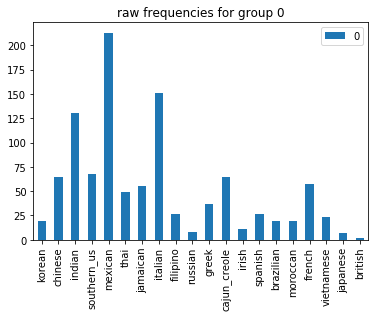

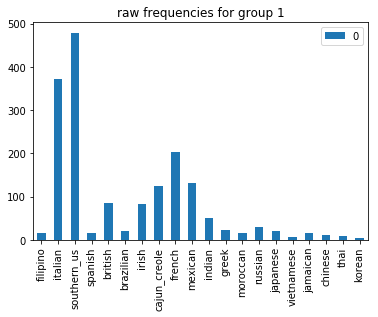

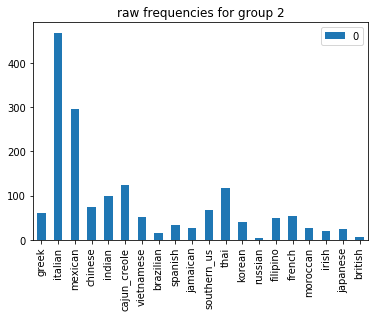

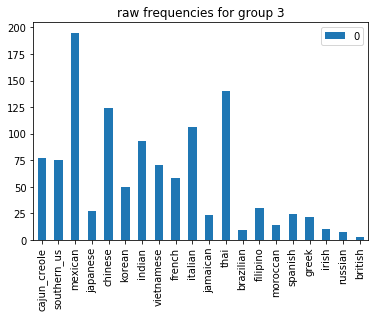

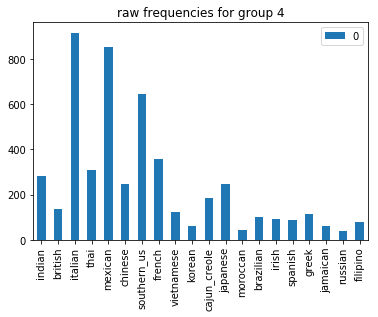

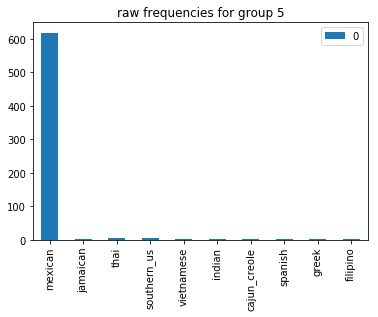

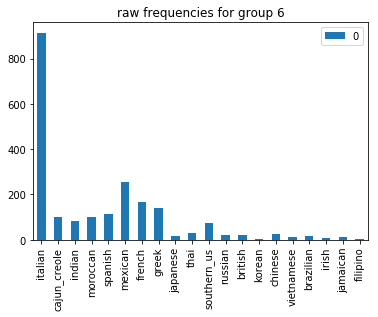

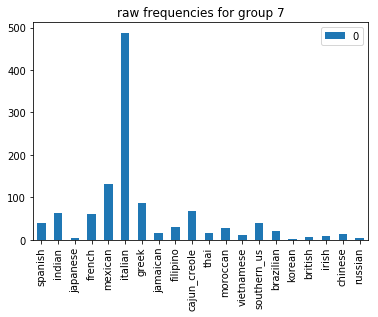

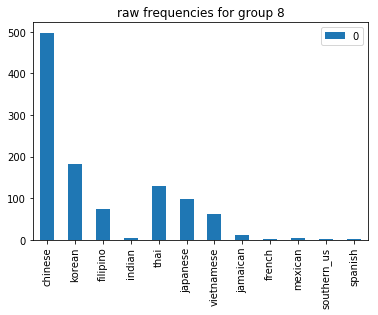

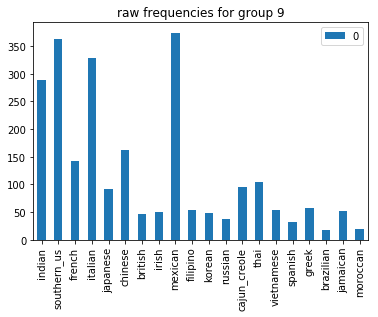

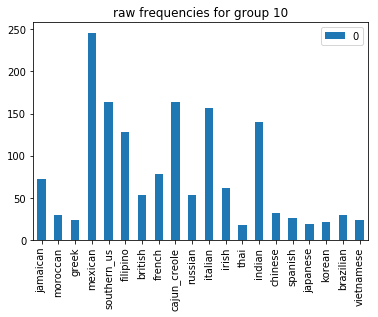

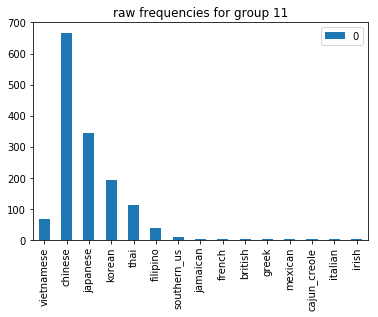

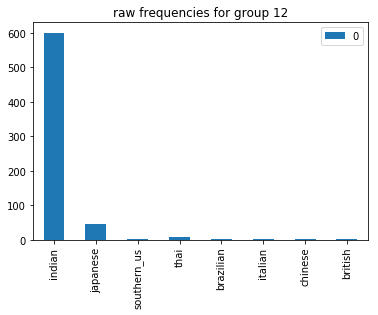

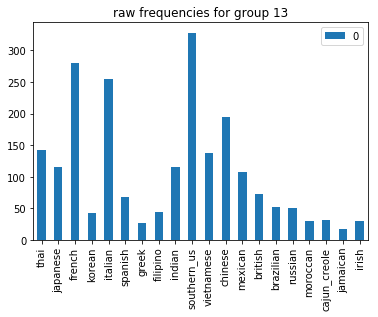

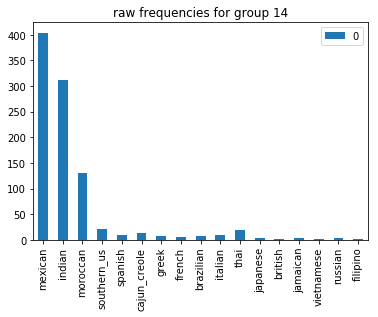

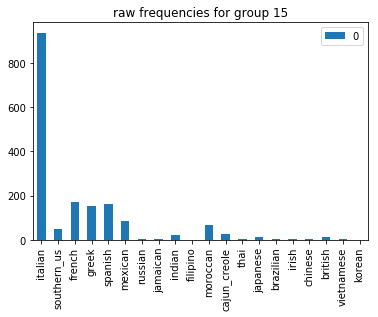

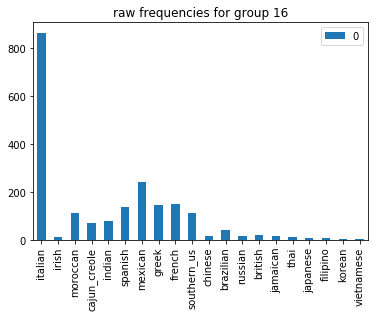

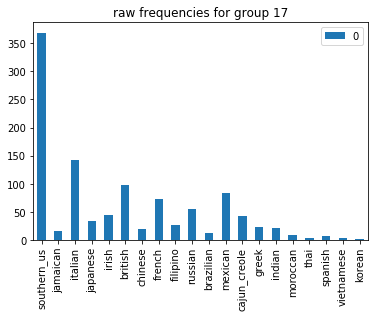

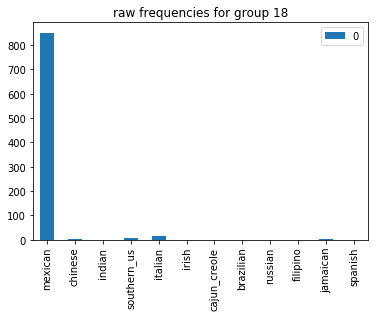

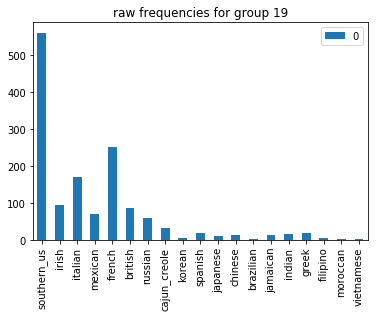

In [100]:
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
from collections import Counter
for i in range(20):
    letter_counts = Counter(histograms[i])
    dHist = pd.DataFrame.from_dict(letter_counts, orient='index')
    title = 'raw frequencies for group '+str(i)
    dHist.plot(kind='bar', title=title)

In [101]:
totals = np.zeros(20)
for i in train_ids:
    index = targets.index(data.loc[i,'cuisine'])
    totals[index] += 1
targets = ['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian']

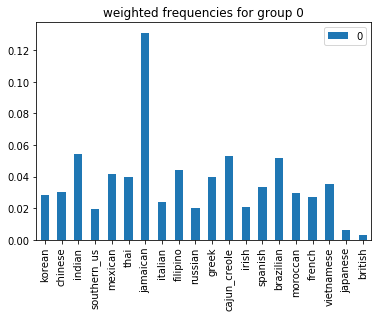

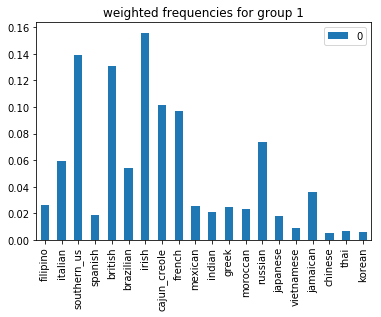

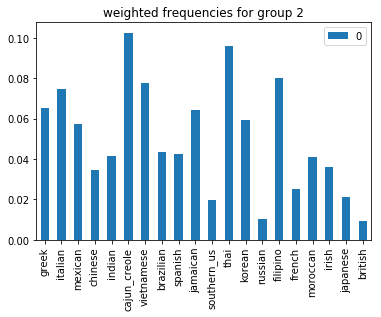

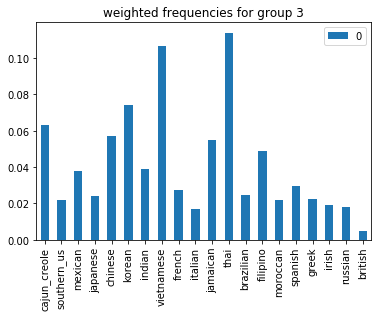

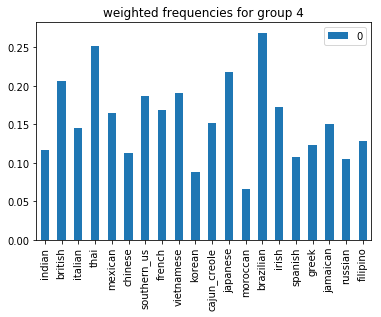

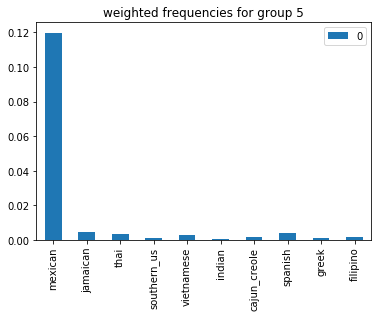

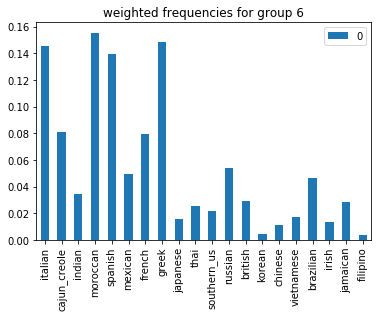

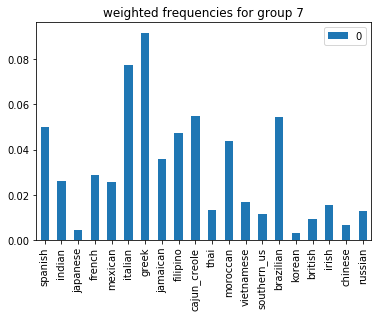

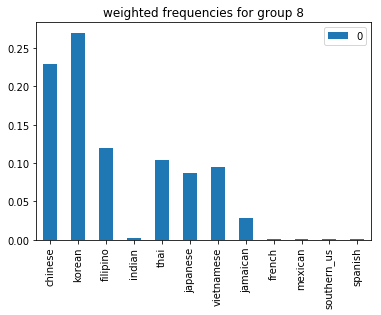

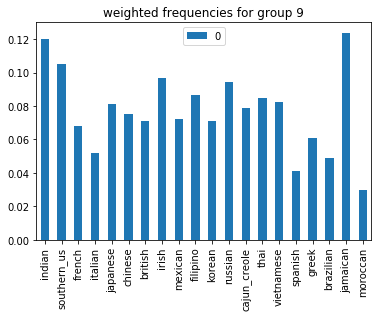

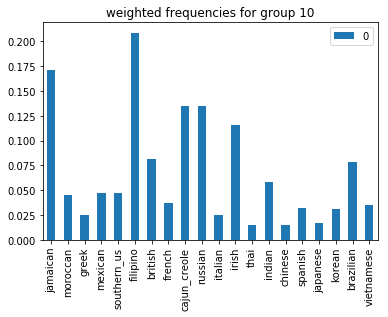

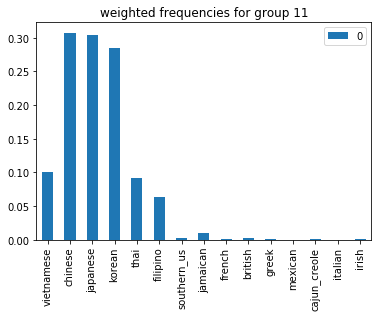

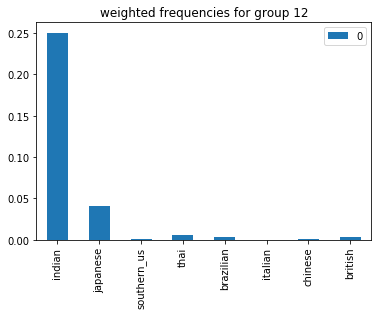

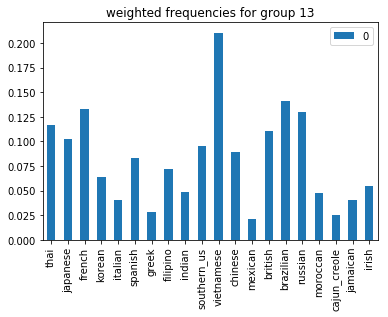

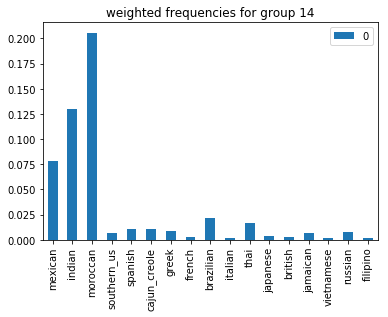

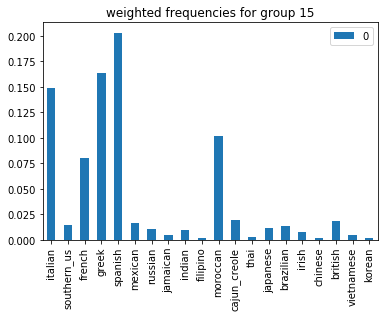

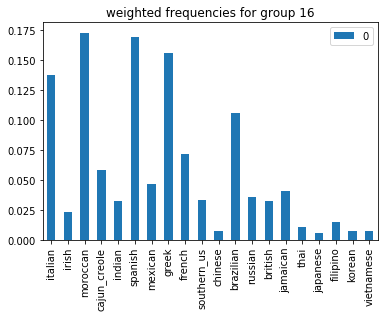

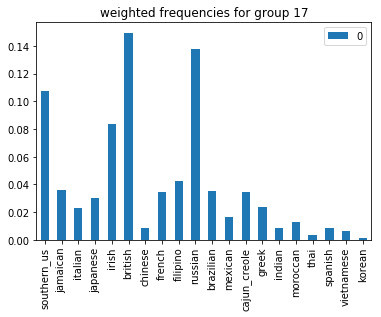

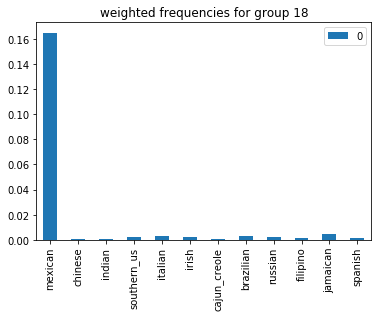

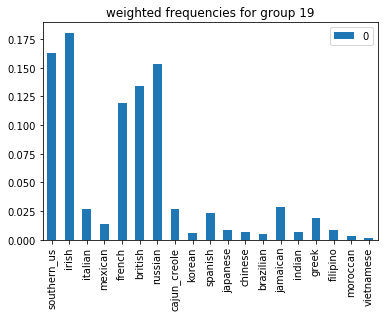

In [111]:
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
from collections import Counter
for i in range(20):
    letter_counts = Counter(histograms[i])
    dHist = pd.DataFrame.from_dict(letter_counts, orient='index')
    typs = dHist.index.unique()
    for typ in typs:
        dHist.loc[typ,0] = dHist.loc[typ,0]/totals[targets.index(typ)]
    #for j in range(20):
    #    dHist.loc[targets[j],0] = dHist.loc[targets[j],0]/totals[j]
    title = 'weighted frequencies for group '+str(i)
    dHist.plot(kind='bar', title=title)

In [51]:
*****************************************************************************************************

0.6711779273780041

In [7]:
#source: https://www.pythoncentral.io/pythons-range-function-explained/
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
count=0
for i in frange(0, 2, 0.1):
    count+=1
    print(i)
print(count)

0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7
0.7999999999999999
0.8999999999999999
0.9999999999999999
1.0999999999999999
1.2
1.3
1.4000000000000001
1.5000000000000002
1.6000000000000003
1.7000000000000004
1.8000000000000005
1.9000000000000006
20


In [8]:
# this suggests hierarchal clustering so lets do that
from sklearn.model_selection import train_test_split
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)


X, placeholder= train_test_split(X, test_size=0.95)
print(X.shape)

'''
#doing feature selection because running k means for many cluster sizes is too slow
from sklearn.feature_selection import VarianceThreshold

X = train_df.values
Xtest = test_df.values
print(X.shape, Xtest.shape)

selector = VarianceThreshold(threshold=0.05)
X = selector.fit_transform(X)
print(X.shape)
'''

(31819, 6714) (7955, 6714)
(1590, 6714)


'\n#doing feature selection because running k means for many cluster sizes is too slow\nfrom sklearn.feature_selection import VarianceThreshold\n\nX = train_df.values\nXtest = test_df.values\nprint(X.shape, Xtest.shape)\n\nselector = VarianceThreshold(threshold=0.05)\nX = selector.fit_transform(X)\nprint(X.shape)\n'

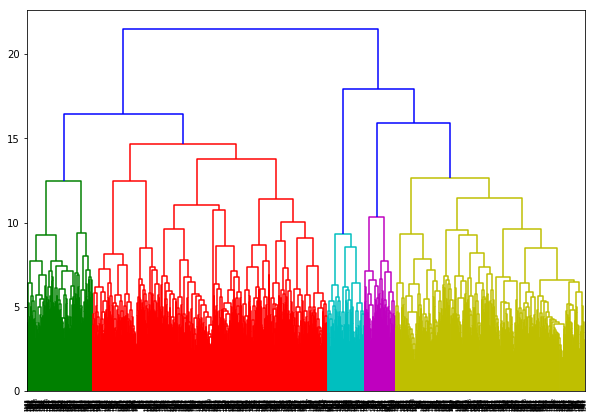

Wall time: 23 s


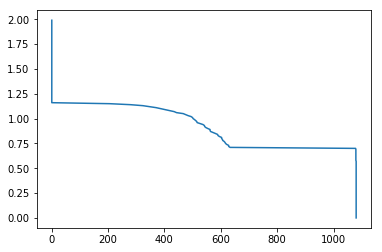

In [12]:
%%time

import matplotlib.pyplot as plt

# see ESLII for cautions when interpreting dendograms
#source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X, method='ward')

labelList = range(1, X.shape[0]+1)

cluster_labels = fcluster(linked, 1)

plt.figure(figsize=(10, 7))  
dend = dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#print(np.unique(cluster_labels).shape)
#print(cluster_labels)
#print(np.unique(cluster_labels))

thresholds = np.zeros(200)
clusterSizes = np.zeros(200)
count=0
for t in frange(0, 2, 0.01):
    cluster_labels = fcluster(linked, t)
    thresholds[count] = t
    clusterSizes[count] = np.unique(cluster_labels).shape[0]
    count+=1
plt.plot(clusterSizes, thresholds)

(31819, 6714) (7955, 6714)
(3181, 6714)


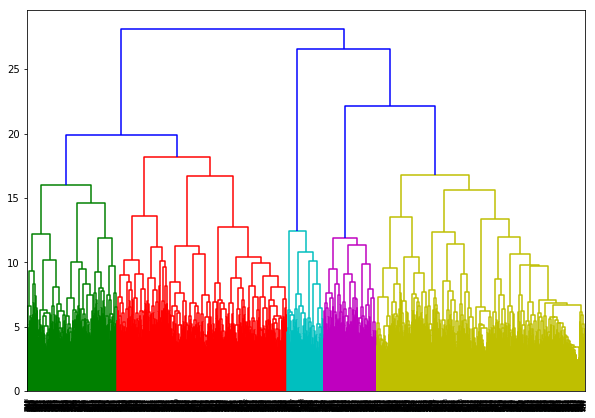

Wall time: 1min 9s


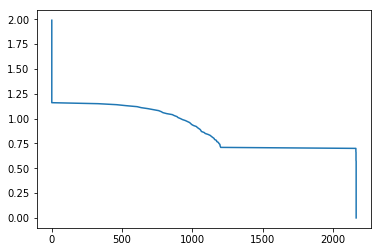

In [15]:
%%time

import matplotlib.pyplot as plt

# this suggests hierarchal clustering so lets do that
from sklearn.model_selection import train_test_split
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)


X, placeholder= train_test_split(X, test_size=0.9)
print(X.shape)

# see ESLII for cautions when interpreting dendograms
#source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X, method='ward')

labelList = range(1, X.shape[0]+1)

cluster_labels = fcluster(linked, 1)

plt.figure(figsize=(10, 7))  
dend = dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#print(np.unique(cluster_labels).shape)
#print(cluster_labels)
#print(np.unique(cluster_labels))

thresholds = np.zeros(200)
clusterSizes = np.zeros(200)
count=0
for t in frange(0, 2, 0.01):
    cluster_labels = fcluster(linked, t)
    thresholds[count] = t
    clusterSizes[count] = np.unique(cluster_labels).shape[0]
    count+=1
plt.plot(clusterSizes, thresholds)

(31819, 6714) (7955, 6714)
(6363, 6714)


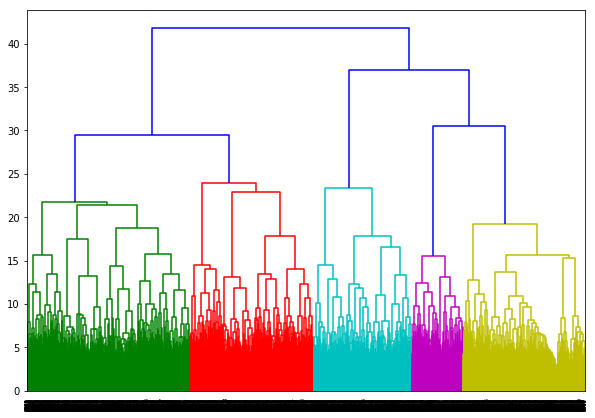

Wall time: 3min 38s


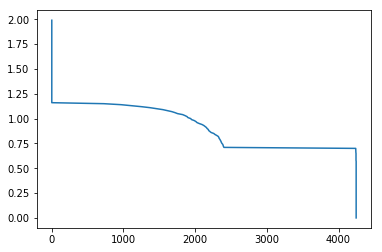

In [16]:
%%time

import matplotlib.pyplot as plt

# this suggests hierarchal clustering so lets do that
from sklearn.model_selection import train_test_split
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)


X, placeholder= train_test_split(X, test_size=0.8)
print(X.shape)

# see ESLII for cautions when interpreting dendograms
#source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X, method='ward')

labelList = range(1, X.shape[0]+1)

cluster_labels = fcluster(linked, 1)

plt.figure(figsize=(10, 7))  
dend = dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#print(np.unique(cluster_labels).shape)
#print(cluster_labels)
#print(np.unique(cluster_labels))

thresholds = np.zeros(200)
clusterSizes = np.zeros(200)
count=0
for t in frange(0, 2, 0.01):
    cluster_labels = fcluster(linked, t)
    thresholds[count] = t
    clusterSizes[count] = np.unique(cluster_labels).shape[0]
    count+=1
plt.plot(clusterSizes, thresholds)

(31819, 6714) (7955, 6714)
(31, 6714)


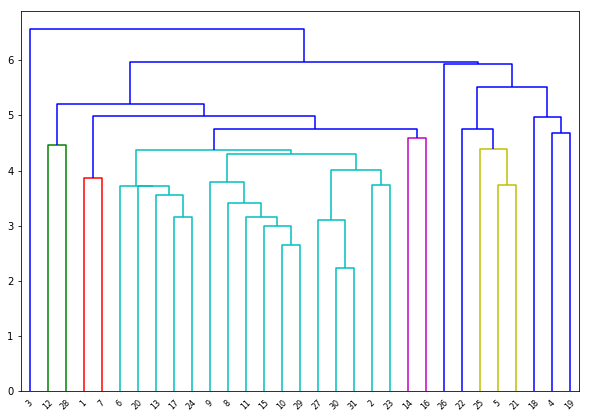

Wall time: 920 ms


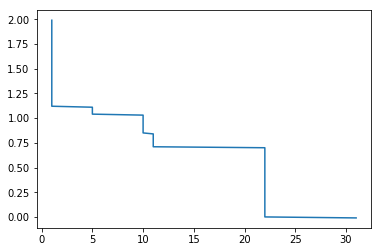

In [21]:
%%time

import matplotlib.pyplot as plt

#not enough memory to do agglom clustering on all data

# this suggests hierarchal clustering so lets do that
from sklearn.model_selection import train_test_split
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)


X, placeholder= train_test_split(X, test_size=0.999)
print(X.shape)

# see ESLII for cautions when interpreting dendograms
#source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

global linked
linked = linkage(X, method='ward')

labelList = range(1, X.shape[0]+1)

global cluster_labels
cluster_labels = fcluster(linked, 1, criterion='maxclust')

plt.figure(figsize=(10, 7))  
dend = dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#print(np.unique(cluster_labels).shape)
#print(cluster_labels)
#print(np.unique(cluster_labels))

global thresholds
thresholds = np.zeros(201)
global clusterSizes
clusterSizes = np.zeros(201)
count=0
for t in frange(-0.01, 2, 0.01):
    cluster_labels = fcluster(linked, t)
    thresholds[count] = t
    clusterSizes[count] = np.unique(cluster_labels).shape[0]
    count+=1
plt.plot(clusterSizes, thresholds)

(31819, 6714) (7955, 6714)
(6363, 6714)


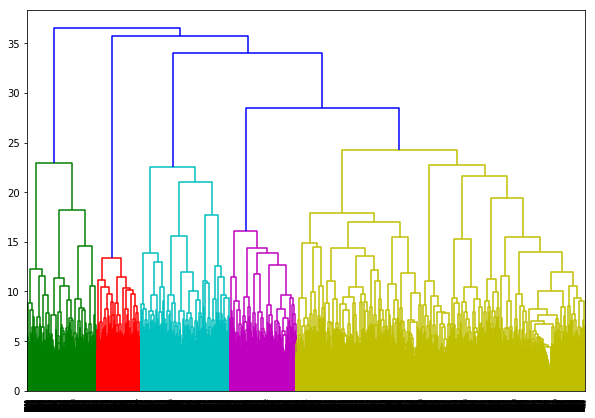

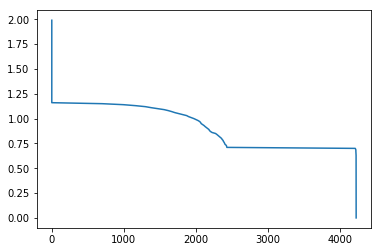

In [71]:
# looking more closely at groupings

import matplotlib.pyplot as plt

# this suggests hierarchal clustering so lets do that
from sklearn.model_selection import train_test_split
X = df_train.values
Xtest = df_test.values
print(X.shape, Xtest.shape)


X, placeholder1, train_ids, placeholder2= train_test_split(X, train_ids, test_size=0.8)
print(X.shape)

# see ESLII for cautions when interpreting dendograms
#source: https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

linked = linkage(X, method='ward')

labelList = range(1, X.shape[0]+1)

cluster_labels = fcluster(linked, 1)

plt.figure(figsize=(10, 7))  
dend = dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

#print(np.unique(cluster_labels).shape)
#print(cluster_labels)
#print(np.unique(cluster_labels))

thresholds = np.zeros(200)
clusterSizes = np.zeros(200)
count=0
for t in frange(0, 2, 0.01):
    cluster_labels = fcluster(linked, t)
    thresholds[count] = t
    clusterSizes[count] = np.unique(cluster_labels).shape[0]
    count+=1
plt.plot(clusterSizes, thresholds)

In [98]:
cluster_labels = fcluster(linked, t=2, criterion='maxclust')-1
print(np.unique(cluster_labels).shape)
print(np.unique(cluster_labels))
print(cluster_labels.shape)
print(cluster_labels)

(2,)
[0 1]
(6363,)
[1 1 0 ... 0 0 1]


In [92]:
# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'salt'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'soy sauce'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'onions'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'pepper'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'all-purpose flour'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'sugar'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'fish sauce'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

# kmeans with k=2 has separated the group into males and females
numInCluster1 = np.sum(cluster_labels)
numInCluster0 = cluster_labels.shape[0] - numInCluster1
numNoSaltInCluster1 = 0
numSaltInCluster0 = 0
count=0
ingred = 'olive oil'
print(ingred)
for i in train_ids:
    if cluster_labels[count] == 1 and 0 == df_train.loc[i,ingred]:
        numNoSaltInCluster1 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,ingred]:
        numSaltInCluster0 += 1
    count += 1
print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)

print('-'*20)

for i in range(20):
    # kmeans with k=2 has separated the group into males and females
    numInCluster1 = np.sum(cluster_labels)
    numInCluster0 = cluster_labels.shape[0] - numInCluster1
    numNoSaltInCluster1 = 0
    numSaltInCluster0 = 0
    count=0
    cuis = targets[i]
    print(cuis)
    for i in train_ids:
        if cluster_labels[count] == 1 and cuis == data.loc[i,'cuisine']:
            numNoSaltInCluster1 += 1
        if cluster_labels[count] == 0 and cuis == data.loc[i,'cuisine']:
            numSaltInCluster0 += 1
        count += 1
    print(100-numNoSaltInCluster1/numInCluster1*100, numSaltInCluster0/numInCluster0*100)
    
print(numInCluster1, numInCluster0)

salt
41.7910447761194 65.83541147132169
soy sauce
9.099082898759221 0.6234413965087282
onions
20.7516633698975 12.094763092269327
pepper
10.321884553137934 12.468827930174564
all-purpose flour
6.293832044596286 44.88778054862843
sugar
14.727566984355335 25.6857855361596
fish sauce
3.5784930767847527 0.4987531172069825
olive oil
21.812623628843724 3.99002493765586
--------------------
greek
96.8890487322424 1.99501246882793
southern_us
92.15968351016004 31.67082294264339
filipino
98.16579751843193 2.369077306733167
indian
91.85398309656537 1.8703241895261846
jamaican
98.70526883654018 1.1221945137157108
spanish
97.35659054126955 1.1221945137157108
italian
79.69789606185938 16.58354114713217
mexican
82.16148174788708 6.109725685785536
chinese
92.60924294191692 0.997506234413965
british
98.63333932745908 7.605985037406484
thai
95.66624707786369 0.3740648379052369
vietnamese
97.89606185937781 0.3740648379052369
cajun_creole
96.42150692321525 4.488778054862843
brazilian
98.561409818378 1.24

In [99]:
histograms = [[],[]]
for i in range(cluster_labels.shape[0]):
    (histograms[cluster_labels[i]]).append(data.loc[train_ids[i],'cuisine'])

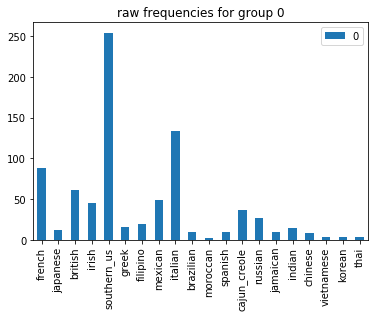

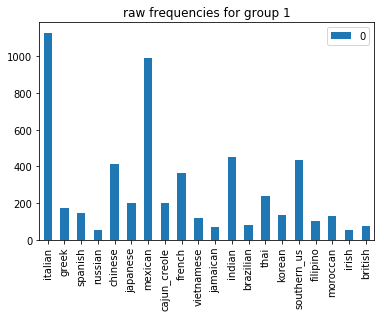

In [100]:
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
from collections import Counter
for i in range(2):
    letter_counts = Counter(histograms[i])
    dHist = pd.DataFrame.from_dict(letter_counts, orient='index')
    title = 'raw frequencies for group '+str(i)
    dHist.plot(kind='bar', title=title)

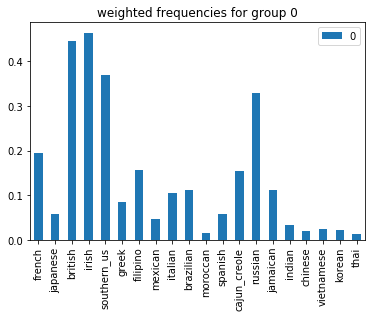

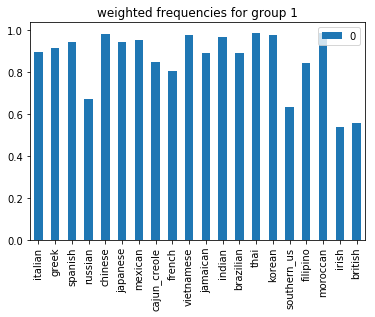

In [101]:
# https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python
from collections import Counter
for i in range(2):
    letter_counts = Counter(histograms[i])
    dHist = pd.DataFrame.from_dict(letter_counts, orient='index')
    typs = dHist.index.unique()
    for typ in typs:
        dHist.loc[typ,0] = dHist.loc[typ,0]/totals[targets.index(typ)]
    #for j in range(20):
    #    dHist.loc[targets[j],0] = dHist.loc[targets[j],0]/totals[j]
    title = 'weighted frequencies for group '+str(i)
    dHist.plot(kind='bar', title=title)

In [89]:
targets = ['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian']

In [94]:
cluster_labels = fcluster(linked, t=3, criterion='maxclust')-1
print(np.unique(cluster_labels).shape)
print(np.unique(cluster_labels))
print(cluster_labels.shape)
print(cluster_labels)

(3,)
[0 1 2]
(6363,)
[2 2 0 ... 0 0 2]


In [95]:
numInCluster2 = np.sum(convert(cluster_labels == 2))
numInCluster1 = np.sum(convert(cluster_labels == 1))
numInCluster0 = np.sum(convert(cluster_labels == 0))
print(numInCluster2, numInCluster0, numInCluster1)
numNoSaltNoOnionsInCluster2 = 0
numSaltNoOnionsInCluster0 = 0
numOnionsInCluster1 = 0
count=0
for i in train_ids:
    if cluster_labels[count] == 2 and 0 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numNoSaltNoOnionsInCluster2 += 1
    if cluster_labels[count] == 0 and 1 == df_train.loc[i,'salt'] and 0 == df_train.loc[i,'onions']:
        numSaltNoOnionsInCluster0 += 1
    if cluster_labels[count] == 1 and 1 == df_train.loc[i,'onions']:
        numOnionsInCluster1 += 1
    count += 1
print(numNoSaltNoOnionsInCluster2/numInCluster2*100, numSaltNoOnionsInCluster0/numInCluster0*100, numOnionsInCluster1/numInCluster1*100)

5065 802 496
47.22606120434353 57.48129675810474 17.338709677419356


In [97]:
totals = np.zeros(20)
for i in train_ids:
    index = targets.index(data.loc[i,'cuisine'])
    totals[index] += 1